In [2]:
import plotly.express as px
import plotly.graph_objects as go
import scipy
from CODE.basicgeo import P2, P3
import numpy as np
import pandas as pd
import time
import os

In [14]:
TLpts_init = [P3(0,0,0),
        P3(0,1000,90),
        P3(0,2000,100),
        P3(0,3000,200),
        P3(0,4000,0)]
TLpts = list(TLpts_init) # points along the tension line

P = (150,140,100,50,10) # Lift distribution

Ltarget = 4050 #Target total length along curve
tol =1e-6
L_err = 1
T_err = 1
tStart = time.time()
iters=0

while L_err + T_err > tol:
    iters +=1
    L = 0
    #Calc total length along curve
    for i in range(1,len(TLpts)):
        L += (TLpts[i]-TLpts[i-1]).Len()
    L_err = abs(Ltarget-L)/Ltarget
    
    #Calc tension at each point 
    Ts = []
    for i in range(1,len(TLpts)-1):
        v1 = TLpts[i]-TLpts[i-1]
        v2 = TLpts[i+1]-TLpts[i]
        #a = np.arccos(P3.Dot(v1,v2)/(v1.Len()*v2.Len()))
        #T = P[i]/(2*np.sin(a/2))
        #SIMPLIFIED USING TRIG IDENTITIES
        c = P3.Dot(v1,v2)/(v1.Len()*v2.Len())
        s = np.sqrt((1 - c)/2)
        T = P[i] / (2*s)
        Ts.append(T)
        #print(np.degrees(a),T)
    T_av = np.mean(Ts)
    T_err = (max(Ts)-T_av)/T_av
    #Adjust each point vertically by amount proportional to error in overall length and specific tension
    for i in range(1,len(TLpts)-1):
        zadj = (Ltarget-L)*0.001 + (Ts[i-1]-T_av)*0.001
        TLpts[i] = TLpts[i] + P3(0,0,zadj)
    
    
    #print(TLpts)
print('Time elapsed', time.time()-tStart, 's. Iterations:',iters)    


Time elapsed 0.5624122619628906 s. Iterations: 24098


In [48]:
tStart = time.time()
iters = 0
def billowErr(zs,zstart, zend, xs,ys,Ltarget):
    global iters
    iters += 1
    L = 0
    TLpts = [P3(xs[0],ys[0],zstart)]
    for i in range(len(zs)):
        TLpts.append(P3(xs[i+1],ys[i+1],zs[i]))
    TLpts.append(P3(xs[-1],ys[-1],zend))
    for i in range(1,len(TLpts)):
        L += (TLpts[i]-TLpts[i-1]).Len()
    
    L_err = abs(Ltarget-L)/Ltarget
    #rint(L,L_err)
    #Calc tension at each point 
    Ts = []
    for i in range(1,len(TLpts)-1):
        v1 = TLpts[i]-TLpts[i-1]
        v2 = TLpts[i+1]-TLpts[i]
        c = P3.Dot(v1,v2)/(v1.Len()*v2.Len())
        s = np.sqrt((1 - c)/2)
        T = P[i] / (2*s)
        Ts.append(T)
    T_av = np.mean(Ts)
    T_err = (max(Ts)-T_av)/T_av

    return L_err + T_err
xs = [0,0,0,0,0]
ys = [0,1000,2000,3000,4000]
zs = [240,279,175]
Ltarget = 4050

opt = scipy.optimize.minimize(billowErr, zs, method = 'Nelder-Mead', args=(0,0,xs,ys,Ltarget), tol = 1e-6)
#billowErr(zs,0, 0, xs,ys,Ltarget)
print('Time elapsed', time.time()-tStart, 's. Iterations:',iters)
opt

Time elapsed 0.020165205001831055 s. Iterations: 373


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.5436155196157028e-05
             x: [ 2.409e+02  2.792e+02  1.756e+02]
           nit: 195
          nfev: 373
 final_simplex: (array([[ 2.409e+02,  2.792e+02,  1.756e+02],
                       [ 2.409e+02,  2.792e+02,  1.756e+02],
                       [ 2.409e+02,  2.792e+02,  1.756e+02],
                       [ 2.409e+02,  2.792e+02,  1.756e+02]]), array([ 1.544e-05,  1.544e-05,  1.544e-05,  1.544e-05]))

In [21]:
TLpts

[P3(0.0, 0.0, 0.0),
 P3(0.0, 1000.0, 240.92166496698627),
 P3(0.0, 2000.0, 279.1883705341265),
 P3(0.0, 3000.0, 175.6335894813603),
 P3(0.0, 4000.0, 0.0)]

In [26]:
L

4049.9981282802837

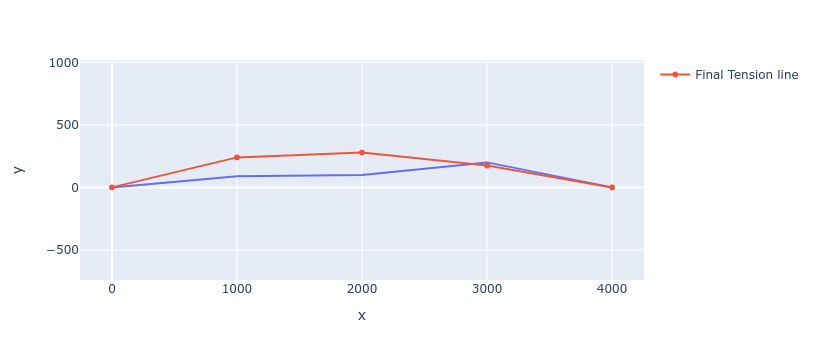

In [5]:
fig = px.line(x= [pt.y for pt in TLpts_init],
             y = [pt.z for pt in TLpts_init])
fig.add_trace(go.Scatter(x = [pt.y for pt in TLpts], 
                         y = [pt.z for pt in TLpts],
                         name = 'Final Tension line'))

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1)
fig.show()

In [18]:
help(P3)

Help on class P3 in module CODE.basicgeo:

class P3(P3)
 |  P3(x, y, z)
 |  
 |  Method resolution order:
 |      P3
 |      P3
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Len(self)
 |  
 |  LenLZ(self)
 |  
 |  Lensq(self)
 |  
 |  __add__(self, a)
 |      Return self+value.
 |  
 |  __mul__(self, a)
 |      Return self*value.
 |  
 |  __neg__(self)
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  __rmul__(self, a)
 |      Return value*self.
 |  
 |  __sub__(self, a)
 |  
 |  assertlen1(self)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  ConvertCZ(p, z)
 |  
 |  ConvertGZ(p, z)
 |  
 |  Cross(a, b)
 |  
 |  Diff(a, b, bfore)
 |  
 |  Dot(a, b)
 |  
 |  ZNorm(v)
 |  
 |  __new__(self, x, y, z)
 |      Create new instance of P3(x, y, z)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inh